In [2]:
import cv2
import matplotlib.pyplot as plt
import tensorflow

In [3]:
model = tensorflow.keras.models.load_model('drowsiness.h5')

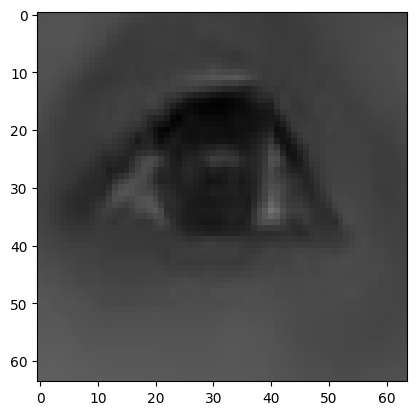

1/1 [==============================] - 0s 23ms/step
[[0.99838305]]


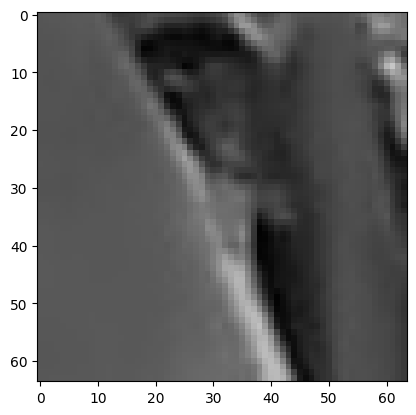

1/1 [==============================] - 0s 30ms/step
[[0.00246548]]


In [11]:
import cv2
import dlib
import numpy as np

def extract_eyes(image_path):
    # Load the face detector from dlib
    detector = dlib.get_frontal_face_detector()

    # Load the facial landmark predictor from dlib
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # Load the input image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray)

    # Create empty lists to store the eye images
    left_eyes = []
    right_eyes = []

    # Loop over the detected faces
    for face in faces:
        # Get the facial landmarks for the face
        landmarks = predictor(gray, face)

        left_eye_coords = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]

        # Get the coordinates of the right eye landmarks
        right_eye_coords = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(42, 48)]

        # Compute the dimensions of the left eye
        left_x_begin = min(left_eye_coords, key=lambda x: x[0])[0]-10
        left_x_end = max(left_eye_coords, key=lambda x: x[0])[0]+10
        left_y_begin = min(left_eye_coords, key=lambda x: x[1])[1]-10
        left_y_end = max(left_eye_coords, key=lambda x: x[1])[1]+10

        # Compute the dimensions of the right eye
        right_x_begin = min(right_eye_coords, key=lambda x: x[0])[0]-10
        right_x_end = max(right_eye_coords, key=lambda x: x[0])[0]+10
        right_y_begin = min(right_eye_coords, key=lambda x: x[1])[1]-10
        right_y_end = max(right_eye_coords, key=lambda x: x[1])[1]+10

        # Extract the region of interest (ROI) for each eye
        left_eye_roi = image[left_y_begin:left_y_end , left_x_begin:left_x_end]
        right_eye_roi = image[right_y_begin:right_y_end , right_x_begin:right_x_end]

        # preprocess 
        left_eye_img = cv2.cvtColor(left_eye_roi, cv2.COLOR_BGR2RGB)
        left_eye_img = cv2.resize(left_eye_img, (64, 64))  # Resize to match model input shape
        left_eye_img = left_eye_img / 255.0  # Normalize pixel values
        left_eye_img = np.expand_dims(left_eye_img, axis=0)  # Add batch dimension

        right_eye_img = cv2.cvtColor(right_eye_roi, cv2.COLOR_BGR2RGB)
        right_eye_img = cv2.resize(right_eye_img, (64, 64))  # Resize to match model input shape
        right_eye_img = right_eye_img / 255.0  # Normalize pixel values
        right_eye_img = np.expand_dims(right_eye_img, axis=0)  # Add batch dimension

        # Append the eye images to the lists
        left_eyes.append(left_eye_img)
        right_eyes.append(right_eye_img)

    # Return the extracted eye images
    return left_eyes[0]

# Test the function
image_path = "38058_1_1829.jpg"
left_eye = extract_eyes(image_path)
prediction = model.predict(left_eye)
print(prediction)